GraphPipelines work similarly to the sklearn Pipeline class. Rather than provide a list of steps, in GraphPipeline you provide a graph of steps using networkx. In GraphPipeline, parents get their inputs from their children. Leafs get the raw inputs (X,y). 

The label of the nodes can be anything, but is unique per instance of an sklearn estimator. Each node has an attribute "instance" for the instance of the step.

By default, the root of the resulting tree will become the final estimator/classifier/transformer.

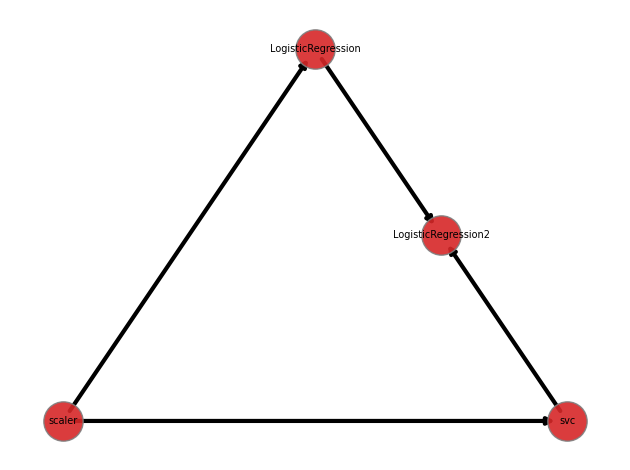

score
0.8974358974358974


In [1]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import networkx as nx
from tpot2 import GraphPipeline
import sklearn.metrics

X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)


g = nx.DiGraph()

g.add_node("scaler", instance=StandardScaler())
g.add_node("svc", instance=SVC())
g.add_node("LogisticRegression", instance=LogisticRegression())
g.add_node("LogisticRegression2", instance=LogisticRegression())

g.add_edge("svc","scaler")
g.add_edge("LogisticRegression", "scaler")
g.add_edge("LogisticRegression2", "LogisticRegression")
g.add_edge("LogisticRegression2", "svc")


est = GraphPipeline(g)
est.plot()

est.fit(X_train, y_train)
print("score")
print(sklearn.metrics.roc_auc_score(y_test, est.predict_proba(X_test)[:,1]))

access nodes through their labels

In [2]:
svc = est.graph.nodes["svc"]["instance"]